Inheritance and the super() Function

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [26]:
class FiniancialInstrumentBase():
    def __init__(self, ticker, start, end):
        if ticker is not None:
            self._ticker = ticker  
            self.start = start
            self.end = end
            self.get_data()
            self.log_returns()

    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker,
                                                                                self.start, self.end)

    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        return self.data["log_returns"]

    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        # plt.title("Price Chart:{}".format(self._ticker), fontsize = 15)

    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))

    def set_ticker(self, ticker=None):
        if ticker is not None:
            self._ticker = ticker  # Update the private _ticker attribute
            self.get_data()  # Fetch new data for the new ticker
            self.log_returns()  # Recompute log returns for the new data

    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resample_price = self.data.price.resample(freq).last()
            resample_returns = np.log(resampled_price / resample_price.shift(1))
            return resample_returns.mean()

    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [40]:
class RiskReturn(FiniancialInstrumentBase): # Inheritce the FiniancialInstrument code. 

    def __init__(self, ticker, start, end, freq = None):
        super().__init__(ticker, start, end)
        self.freq = freq
    
    def __repr__(self):
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
        
    def mean_return(self):
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
            
    def std_returns(self):
        if self.freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()

    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [42]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31", freq = "w")

[*********************100%***********************]  1 of 1 completed


In [43]:
stock.freq

'w'

In [44]:
stock._ticker

'aapl'

In [48]:
stock.data

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703
...,...,...
2019-12-23,71.000000,0.016187
2019-12-24,71.067497,0.000950
2019-12-26,72.477501,0.019646


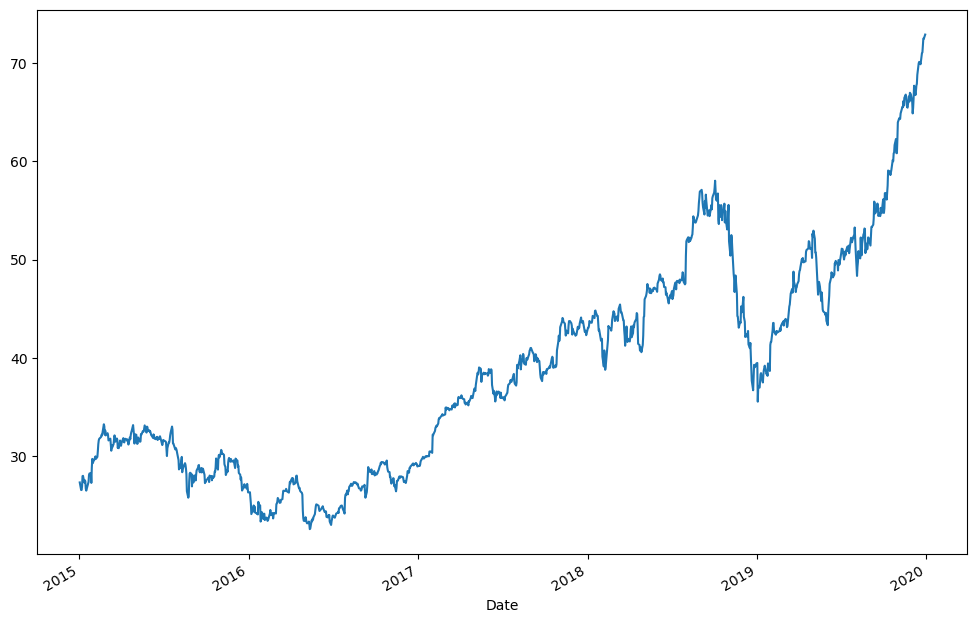

In [56]:
stock.plot_prices()

In [58]:
stock.mean_return()

C:\Users\audri\AppData\Local\Temp\ipykernel_11512\503701661.py:14: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  resampled_price = self.data.price.resample(self.freq).last()


0.0037576158168232733